# Exploratory data analysis(EDA) and data pre-processing

Loading Dataset for investigation

In [532]:
import numpy as np
import pandas as pd  # conda install pandas
bank = pd.read_csv('bank.csv')

import matplotlib.pyplot as plt
import seaborn as sns 

In [533]:
bank.shape # has 4521 rows and 17 coloumns

(4521, 17)

In [534]:
bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Observations- 
1. There are 7 integer and 10 object including y.
2. There are no null values in the dataset 


In [535]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Exploring the values of categorical features.

In [536]:
for col in bank.select_dtypes(include='object').columns:
    print(col)
    print(bank[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


Observations:
There are 9 categorical features excluding y-target variable.
Both job and month have the highest number of categorical values.

In [537]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


# Identiftiying any missing or null values in the dataset.

In [538]:
 bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Note:
This confrms there are no missing or null values.

In [539]:
bank.duplicated().sum() # idntifiying any duplicates 

0

Note:
There are no duplicates in the dataset.

# Investigating if there are any features with one value.

In [540]:
for column in bank.columns:
    print(column,bank[column].nunique())

age 67
job 12
marital 3
education 4
default 2
balance 2353
housing 2
loan 2
contact 3
day 31
month 12
duration 875
campaign 32
pdays 292
previous 24
poutcome 4
deposit 2


Observation-There is no feature with only one value

Overview of the first 5 coloumns in the dataset.

In [541]:
bank.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Target variable- Class distribution

In [542]:
bank['deposit'].value_counts()  # A high difference between 'yes' and 'no' of 3,479 indicating high imbalalnce

no     4000
yes     521
Name: deposit, dtype: int64

In [543]:
bank['deposit'].value_counts('deposit') 
# The proportion of class in relation to the target label still shows a high imbalance in data
# percentage calculated as 'no' class 88.84% significantly dominates the 'yes' class 11.52%
# The dataset exhibits a highly imbalanced class distribution. Imbalanced class distributions can pose challenges in 
# machine learning tasks, particularly if the minority class (in this case, 'yes') is of interest and requires accurate predictions.

no     0.88476
yes    0.11524
Name: deposit, dtype: float64

Distribution of term deposits is imbalanced, a very high number of 'no' in comparison to 'yes'obtained indicating some imbalance

Graph displaying the subscriptions outome of the bank marketing campaign

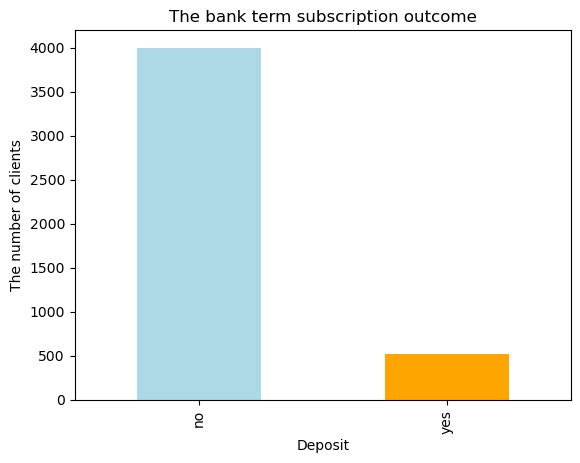

In [544]:
import matplotlib.pyplot as plt
colors = ['lightblue', 'orange']
bank['deposit'].value_counts().plot(kind='bar', color=colors)
plt.title('The bank term subscription outcome')
plt.xlabel("Deposit")
plt.ylabel("The number of clients")
plt.show()

In [545]:
Numerical_data=['age', 'balance', 'day', 'duration','campaign', 'pdays','previous']
Categorical_data=['job','marital','education','default','housing','month','loan','contact','poutcome']
print('Total numerical coloumns in dataset = ', len(Numerical_data))
print('Total categorical coloumns in dataset = ', len(Categorical_data))
print('Total independendent variables of dataset = ', len(Numerical_data)+len(Categorical_data))

Total numerical coloumns in dataset =  7
Total categorical coloumns in dataset =  9
Total independendent variables of dataset =  16


In [546]:
numerical_features=bank[numerical_data]
Numerical_features

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [547]:
discrete_feature=[feature for feature in Numerical_features if len(data[feature].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [548]:
continuous_features=[feature for feature in Numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


# Object data type analysis

# The numerical features associated with the target y variable(label)

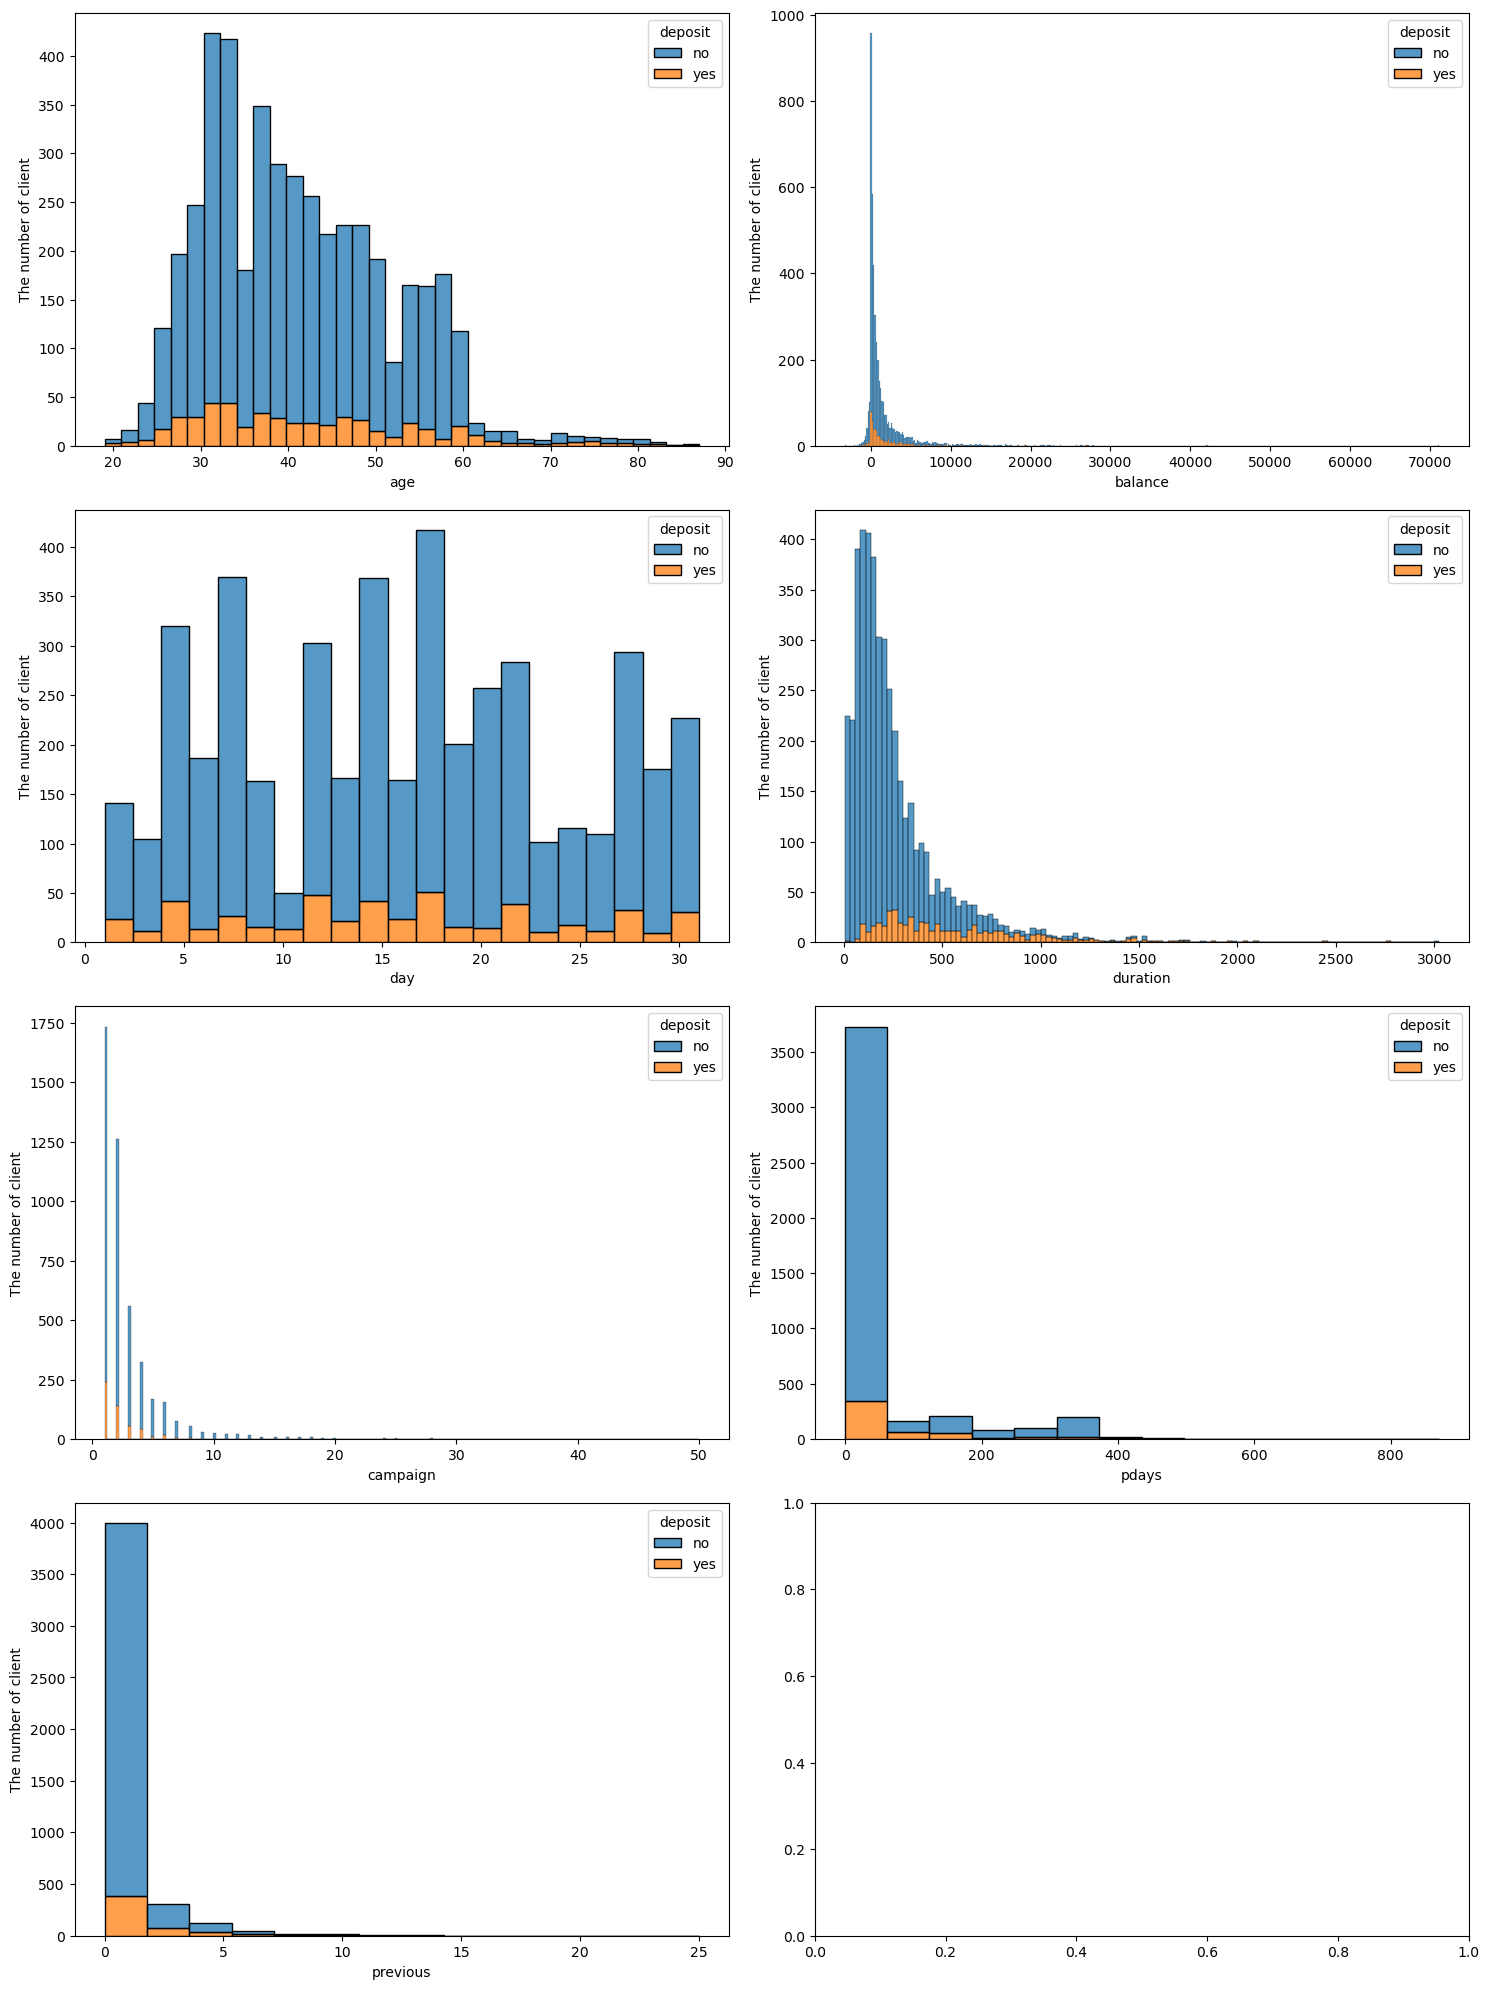

In [549]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, var in enumerate(numerical_data):
    sns.histplot(x=var, hue='deposit', data=bank, ax=axs[i], multiple="stack")
    axs[i].set_ylabel('The number of client') 
    
fig.tight_layout()
plt.show()

# Statisical analysis of significance of numerical features

In [550]:
Numerical_features.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000
95%,59.000000,6102.000000,30.000000,763.000000,8.000000,317.000000,3.000000
99%,72.000000,14194.600000,31.000000,1259.000000,16.000000,370.000000,8.000000


# Outlier treatment of numerical features in dataset

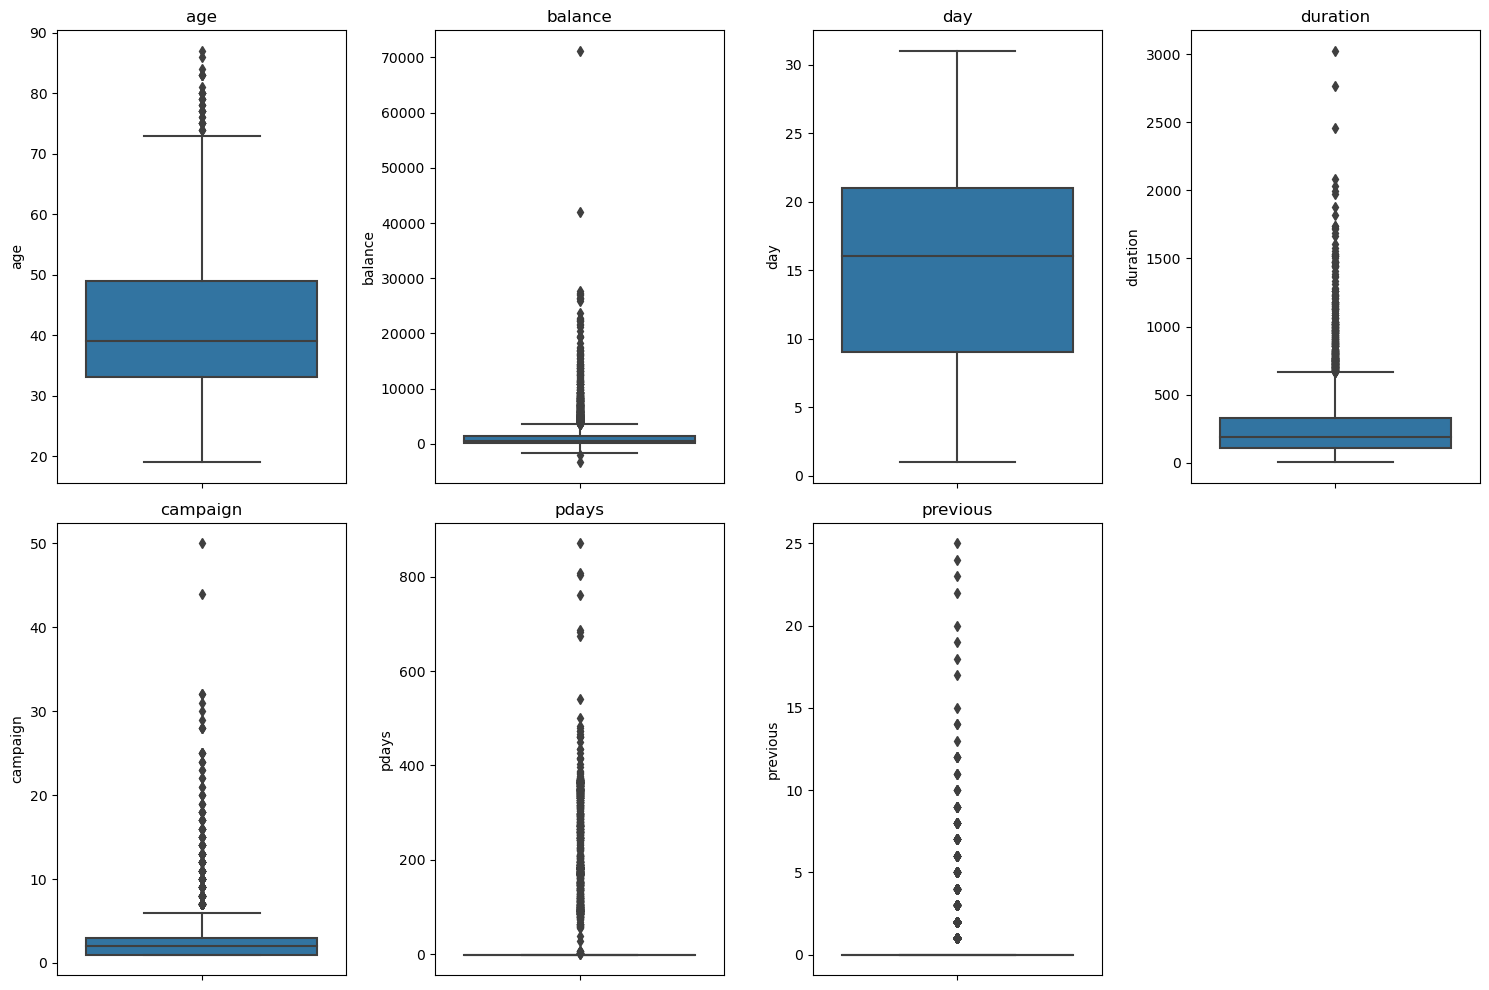

In [551]:
numerical_features = len(Numerical_data)
numerical_rows = int(np.ceil(num_features / 4))
numerical_cols = min(num_features, 4)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(Numerical_data):
    sns.boxplot(y=feature, data=data, ax=axes[i])
    axes[i].set_title(feature)

# Remove extra subplots if any
if num_features < len(axes):
    for j in range(num_features, len(axes)):
        fig.delaxes(axes[j])
        
plt.tight_layout()
plt.show()

Observations:
(1) A high number of outlier observed observed in balance , duration, campaign, p-days and previous.

# The correlation matrix between the numerical features of the dataset

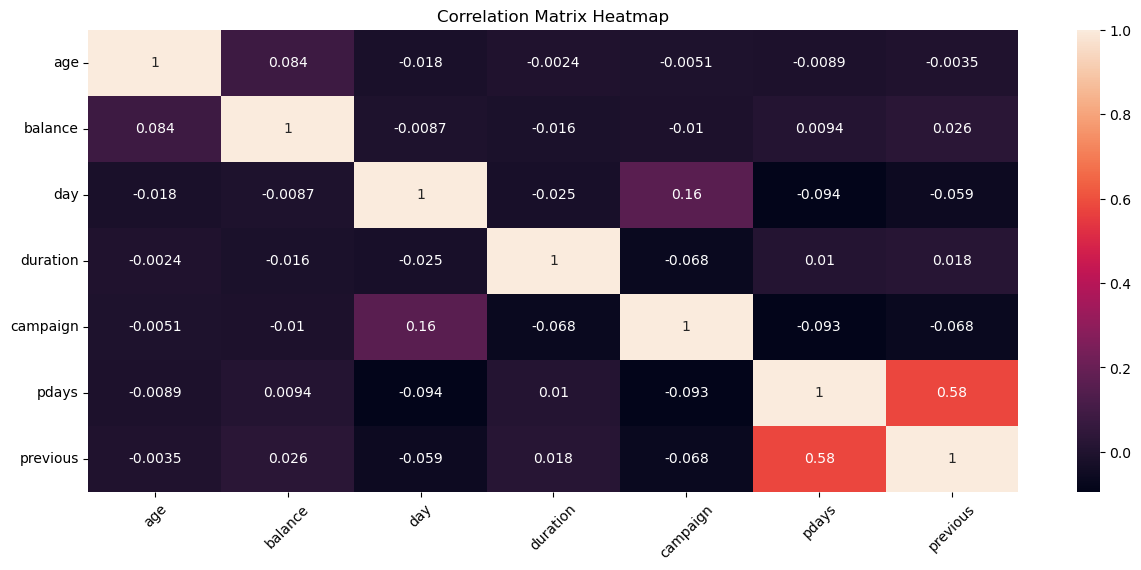

In [552]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = bank.corr()
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()

In [553]:
categorical_features=data[categorical_data]
categorical_features

,job,marital,education,default,housing,month,loan,contact,poutcome
0,unemployed,married,primary,0,0,oct,0,cellular,unknown
1,services,married,secondary,0,1,may,1,cellular,failure
2,management,single,tertiary,0,1,apr,0,cellular,failure
3,management,married,tertiary,0,1,jun,1,unknown,unknown
4,blue-collar,married,secondary,0,1,may,0,unknown,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,0,1,jul,0,cellular,unknown
4517,self-employed,married,tertiary,1,1,may,1,unknown,unknown
4518,technician,married,secondary,0,0,aug,0,cellular,unknown
4519,blue-collar,married,secondary,0,0,feb,0,cellular,other


# The distribution of categorical features in the dataset

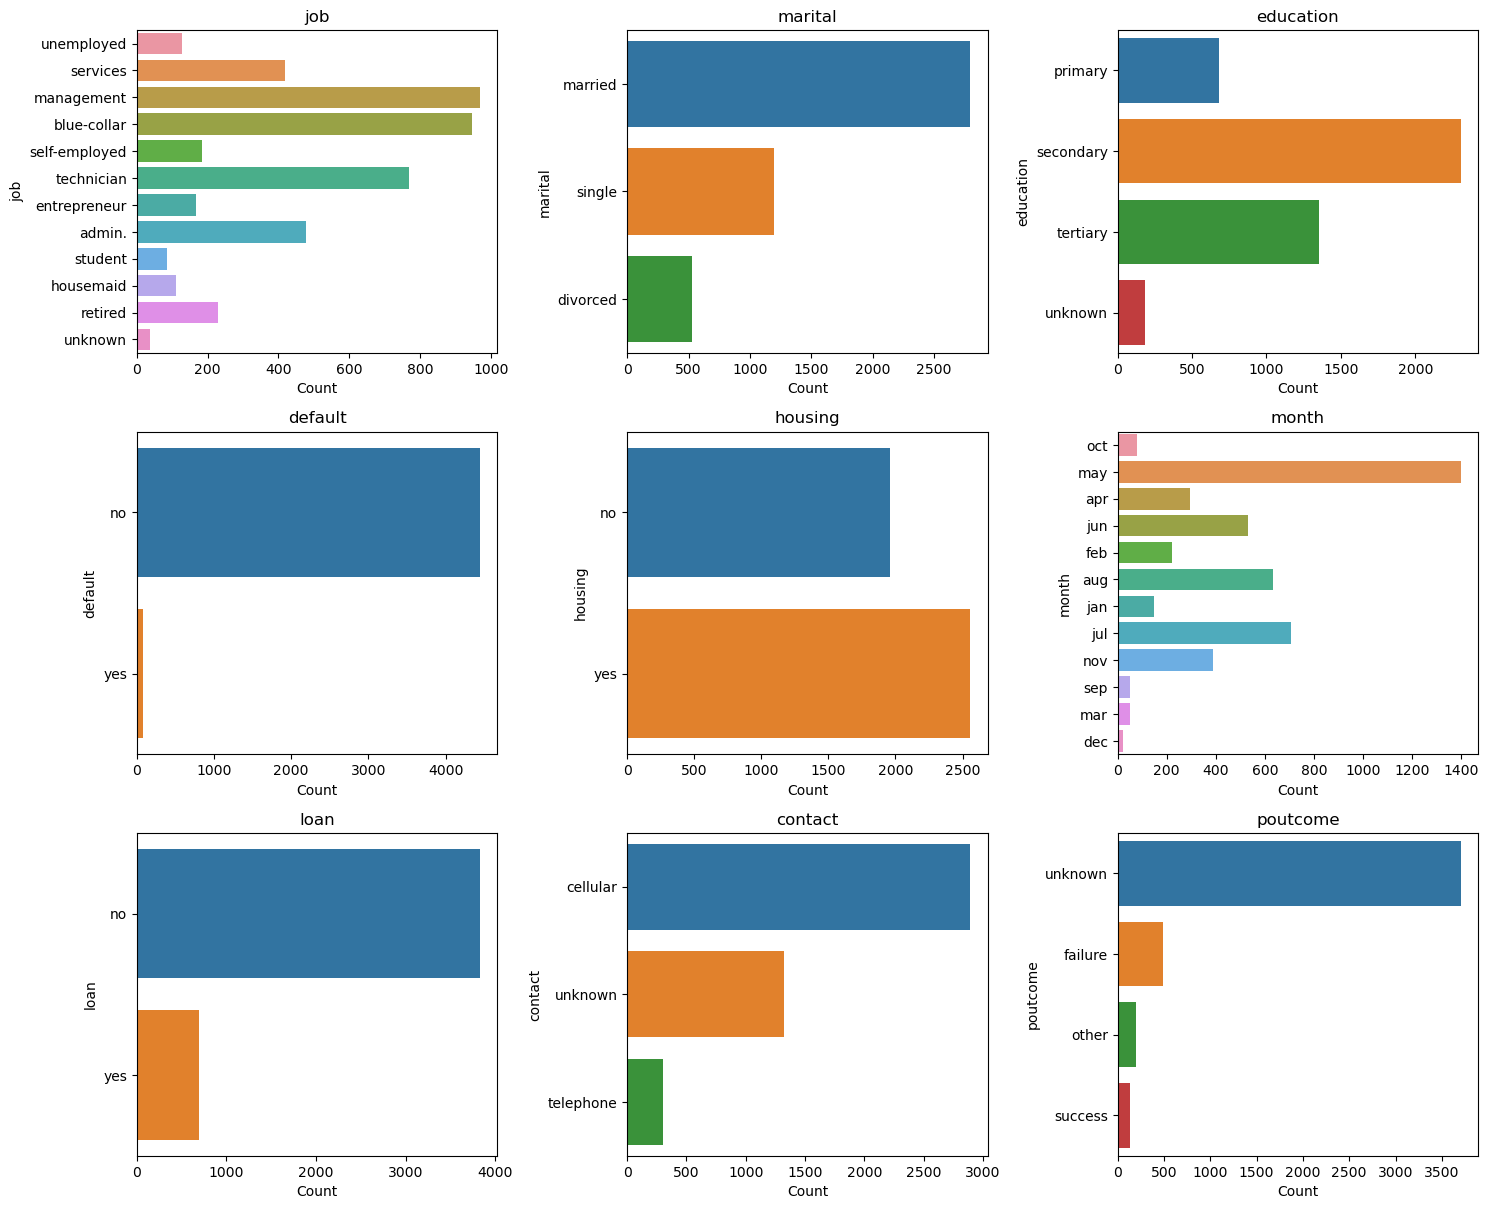

In [554]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 80))
plotnumber = 1

for Categorical_feature in Categorical_features:
    ax = plt.subplot(20, 3, plotnumber)  # Adjust the subplot layout
    sns.countplot(y=Categorical_feature, data=bank)
    plt.xlabel("Count")
    plt.ylabel(Categorical_feature)  # Swap x and y axes for better readability
    plt.title(Categorical_feature)
    plotnumber += 1

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


Observations:
(1) The high number of clients job type was maangement, with housemaid being the lowest. 
(2) Married clients greater record than divorced. 
(3) Highest education background was secondary education.
(4) The default feature had the lowest value of yes and highest value of no which provides no significance in the dataset. 
(5) The month May shows the highest record of subscription and lowest subscription observed in December.

# The categorical features associated with the target y variable(label)

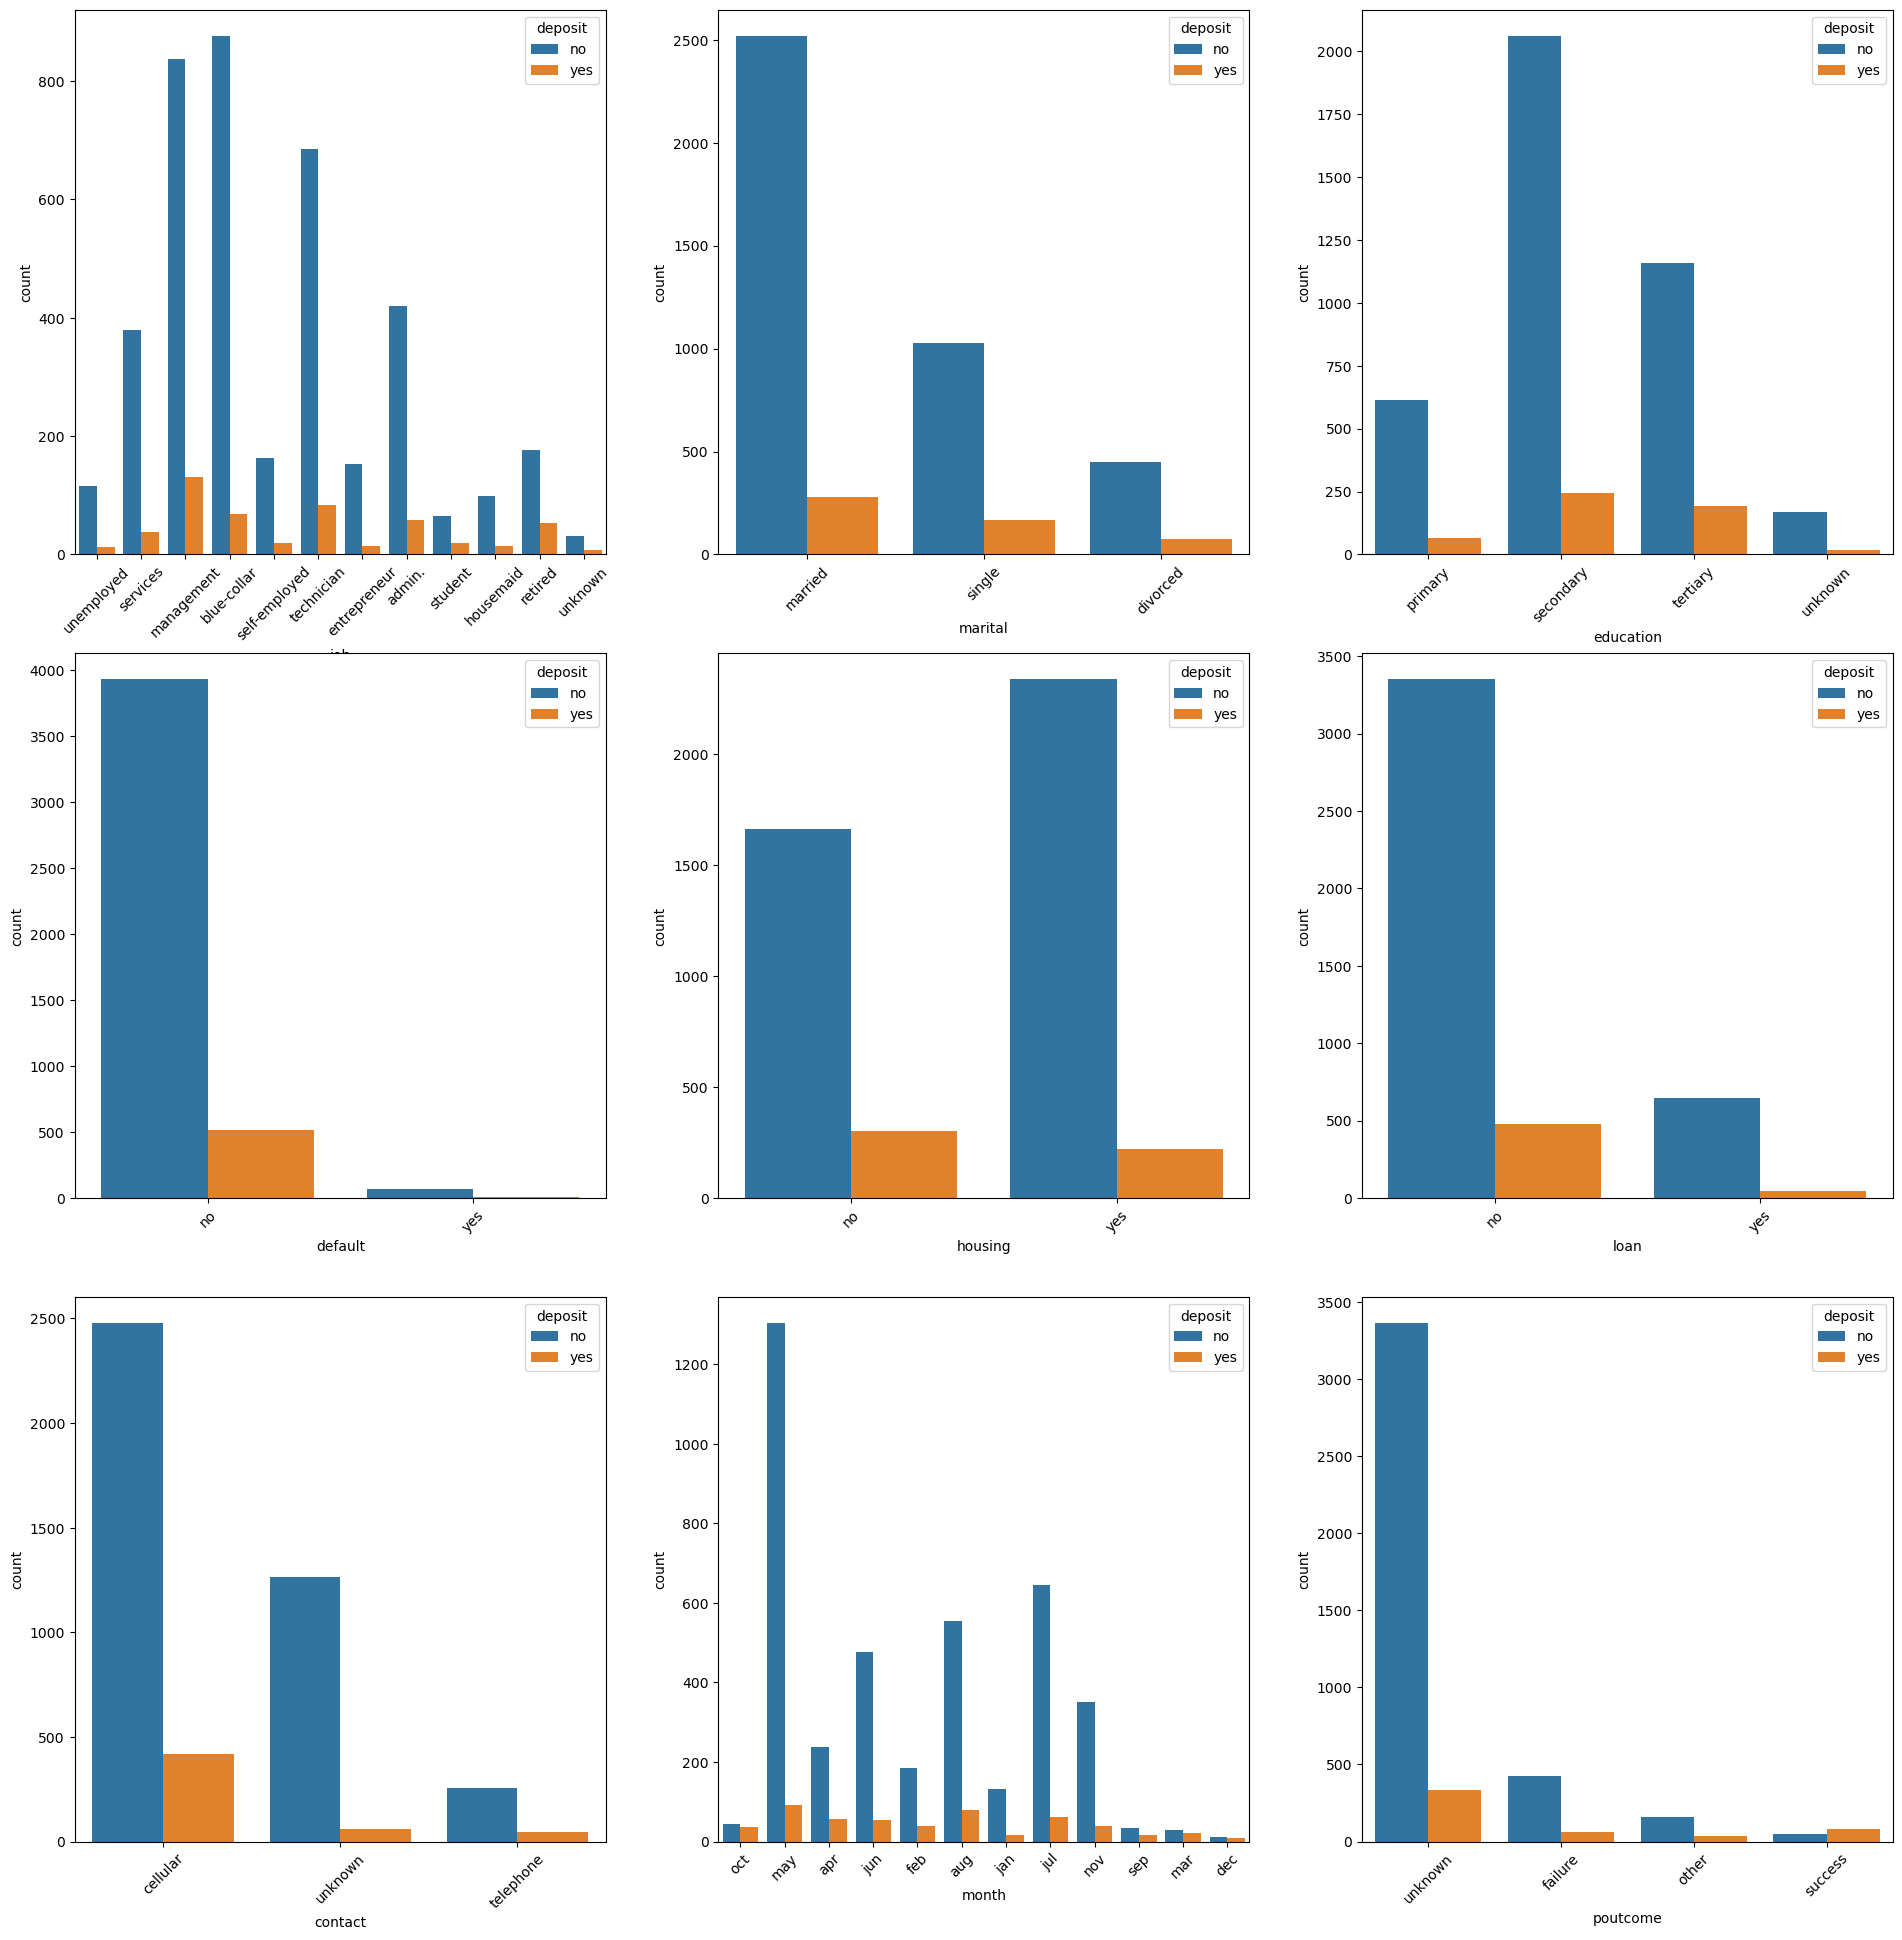

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = bank.select_dtypes('O').columns
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(categorical_columns, axes.flatten()):
    sns.countplot(x=col, data=bank, hue='deposit', ax=ax)
    ax.tick_params(axis='x', rotation=45)
plt.show()



Observations of featres:
(1) Managment client job roles had highest subsciptions to term deposit. 
(2) Married clients had the highest suscriptions to term deposit.
(3) Secondary edeucated had the highest suscriptions to term deposit.
(4) Default means whether client has credit in bank or not. Highest number of clients without (default) credit not subscribing. 
(5) Clients with housing had a lower subscription in comparison to those without housing.
(6) Clients with loan had the lowest, closer to 0 subscriptions.
(7) Cellular contact provided the highest subscriptions to term deposit.
(8) May had the highest term deposit subscriptions and December the lowest subscriptions.
(9) A high number of unknown poutcome to subscriptions observed followed by sucessful pre-campaign outcome.

# Encoding and data pre-processing.

The numerical and categorical features in the dataset

In [556]:
numerical_data=['age', 'balance', 'day', 'duration','campaign', 'pdays','previous']
categorical_data=['job','marital','education','default','housing','month','loan','contact','poutcome']
print('Total numerical features in dataset = ', len(numerical_data))
print('Total categorical features in dataset = ', len(categorical_data))
print('Total independendent variables of dataset = ', len(numerical_data)+len(categorical_data))

Total numerical features in dataset =  7
Total categorical features in dataset =  9
Total independendent variables of dataset =  16


In [557]:
numerical = bank[numerical_data]
numerical.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [558]:
categorical= bank[categorical_data]
categorical.head()

,job,marital,education,default,housing,month,loan,contact,poutcome
0,unemployed,married,primary,no,no,oct,no,cellular,unknown
1,services,married,secondary,no,yes,may,yes,cellular,failure
2,management,single,tertiary,no,yes,apr,no,cellular,failure
3,management,married,tertiary,no,yes,jun,yes,unknown,unknown
4,blue-collar,married,secondary,no,yes,may,no,unknown,unknown


One hot encoding for categorical features.

In [559]:
new_categorical=pd.get_dummies(categorical)
new_categorical.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [560]:
encoded_bank=pd.concat([numerical, new_categorical], axis=1)
encoded_bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [561]:
target_outcome=bank['deposit']
target_outcome.head()

0    no
1    no
2    no
3    no
4    no
Name: deposit, dtype: object

In [562]:
target_outcome=bank['deposit']
encoded_bank['target_outcome']=(bank.deposit=='yes').astype('int')
encoded_bank

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,target_outcome
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


# Data spliting post Encoding into training and testing

In [568]:
no_columns= encoded_bank.shape[1]
x_data=encoded_bank.iloc[:,:no_columns-1]
y_data=encoded_bank.iloc[:, no_columns-1:]
x_data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [569]:
y_data

,target_outcome
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [574]:
encoded_bank['target_outcome'].value_counts()

0    4000
1     521
Name: target_outcome, dtype: int64

In [576]:
encoded_bank['target_outcome'].value_counts('0')

0    0.88476
1    0.11524
Name: target_outcome, dtype: float64

In [577]:
encoded_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_admin.           4521 non-null   uint8
 8   job_blue-collar      4521 non-null   uint8
 9   job_entrepreneur     4521 non-null   uint8
 10  job_housemaid        4521 non-null   uint8
 11  job_management       4521 non-null   uint8
 12  job_retired          4521 non-null   uint8
 13  job_self-employed    4521 non-null   uint8
 14  job_services         4521 non-null   uint8
 15  job_student          4521 non-null   uint8
 16  job_technician       452

Checking for colinearity in the numerical features

Feature selection 

Feature selection using fisher scoring for numerical features 

In [405]:
# Data Normalisation - standard 
# split numeric and categorical
# then concated 
# before oversampling split data 


# Train and Test spliting of dataset 

In [578]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_data,y_data,test_size=0.2,random_state=42) # check range


In [579]:
X_train.shape

(3616, 51)

In [580]:
X_test.shape

(905, 51)

In [581]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
978,34,262,20,371,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
251,32,2349,14,134,5,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3139,34,1076,8,70,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1822,31,156,13,657,7,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4445,46,258,27,217,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,1536,4,54,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
466,34,-370,21,748,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3092,46,523,6,105,4,366,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3772,47,440,21,71,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [582]:
y_train

,target_outcome
978,0
251,0
3139,0
1822,1
4445,0
...,...
4426,0
466,0
3092,0
3772,0


Downloading libraries for Normalisation, Standardisation and Machine learning models

In [627]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Oversampling using SMOTE and Standardisation

In [597]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_data, y_data)
x_resampled

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,54,2759,15,165,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
7996,34,959,26,1354,3,172,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7997,41,523,18,682,6,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7998,57,0,15,218,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [598]:
y_resampled

,target_outcome
0,0
1,0
2,0
3,0
4,0
...,...
7995,1
7996,1
7997,1
7998,1


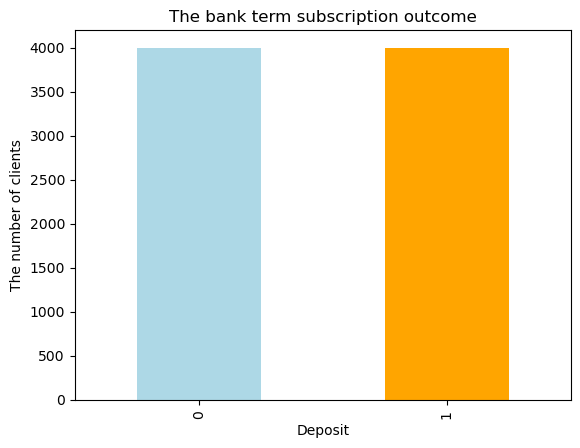

In [660]:
plt.figure()
colors = ['lightblue', 'orange']
y_resampled['target_outcome'].value_counts().plot(kind='bar',color=colors)
plt.title('The bank term subscription outcome')
plt.xlabel("Deposit")
plt.ylabel("The number of clients")
plt.show()
# After re-sampling  training data a balance is achieved by over_sampling.

In [600]:
# Perform normalisation using StandardScaler
scaler = StandardScaler()
x_normalised = scaler.fit_transform(x_resampled)
x_normalised

array([[-1.06391883,  0.12054243,  0.4454303 , ..., -0.16776615,
        -0.20709612,  0.64861915],
       [-0.78432035,  1.23864519, -0.59796108, ..., -0.16776615,
        -0.20709612, -1.54173678],
       [-0.59792136, -0.04221937,  0.05415853, ..., -0.16776615,
        -0.20709612, -1.54173678],
       ...,
       [-0.03872439, -0.35023768,  0.31500638, ..., -0.16776615,
        -0.20709612,  0.64861915],
       [ 1.45246752, -0.5450304 , -0.07626539, ..., -0.16776615,
        -0.20709612,  0.64861915],
       [-1.34351731, -0.46495309,  0.4454303 , ..., -0.16776615,
        -0.20709612,  0.64861915]])

KNN Neighbor 

Calculating k-fold to find best k-fold

In [631]:
from sklearn.model_selection import cross_val_score

for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, x_data, y_data, cv=5)
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    
    print(f"For K={i}, Mean Accuracy: {mean_accuracy*100:.2f}%")
    print(f"For K={i}, Standard Deviation of Accuracy: {std_accuracy*100:.2f}%")
    print()


For K=2, Mean Accuracy: 87.97%
For K=2, Standard Deviation of Accuracy: 0.45%

For K=3, Mean Accuracy: 86.68%
For K=3, Standard Deviation of Accuracy: 0.76%

For K=4, Mean Accuracy: 87.81%
For K=4, Standard Deviation of Accuracy: 0.49%

For K=5, Mean Accuracy: 87.30%
For K=5, Standard Deviation of Accuracy: 0.73%

For K=6, Mean Accuracy: 87.59%
For K=6, Standard Deviation of Accuracy: 0.53%

For K=7, Mean Accuracy: 87.28%
For K=7, Standard Deviation of Accuracy: 0.59%

For K=8, Mean Accuracy: 87.86%
For K=8, Standard Deviation of Accuracy: 0.29%

For K=9, Mean Accuracy: 87.79%
For K=9, Standard Deviation of Accuracy: 0.30%



In [634]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
knn3_train_pred = knn3.predict(x_train)
knn3_test_pred = knn3.predict(x_test)
print("Training set report: \n", classification_report(y_train, knn3_train_pred))
print("Test set report: \n", classification_report(y_test, knn3_test_pred))

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predictor= knn.predict(x_test)
knn_report= classification_report(y_test, knn_predictor)


Training set report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      3199
           1       0.98      0.93      0.95      3201

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400

Test set report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       801
           1       0.95      0.90      0.93       799

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



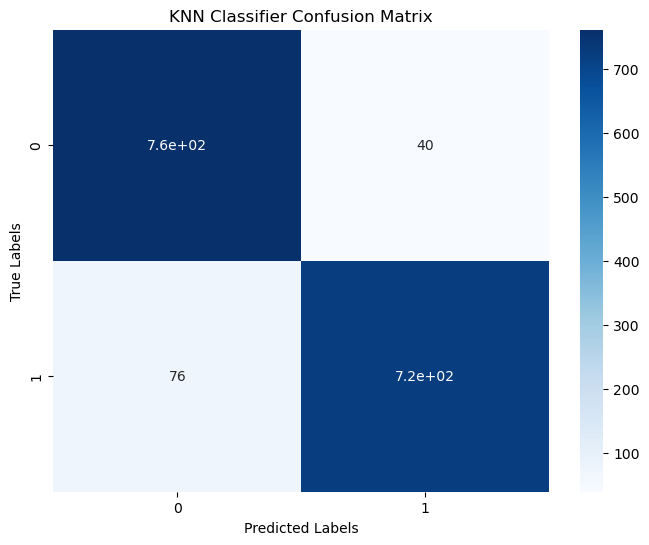

In [635]:
# KNN Classifier Confusion Matrix
knn_cm = confusion_matrix(y_test, knn3_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues')
plt.title('KNN Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

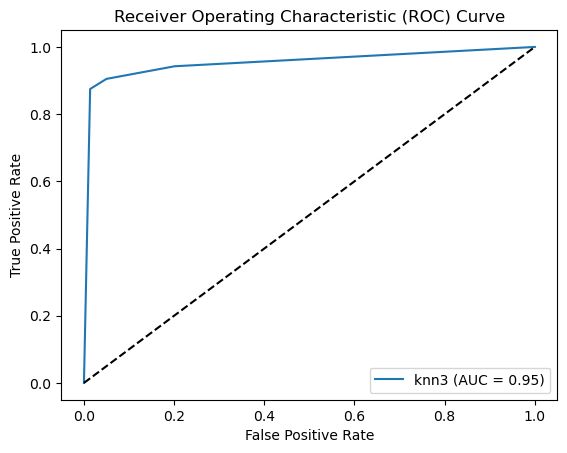

In [637]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
knn3_test_pred_proba = knn3.predict_proba(x_test)[:, 1]

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, knn3_test_pred_proba)
auc_score = roc_auc_score(y_test, knn3_test_pred_proba)


plt.plot(fpr, tpr, label=f'knn3 (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Logistic regression 

In [603]:
logistic_regression = LogisticRegression() 
logistic_regression.fit(x_train, y_train)
logistic_regression_preds = logistic_regression.predict(x_test)
logistic_regression_report = classification_report(y_test, logistic_regression_preds)
print("Logistic Regression Report:")
print(logistic_regression_report)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.97      0.90      0.94       799

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



Confusion Matrix For Logistic Regression:
[[780  21]
 [ 78 721]]


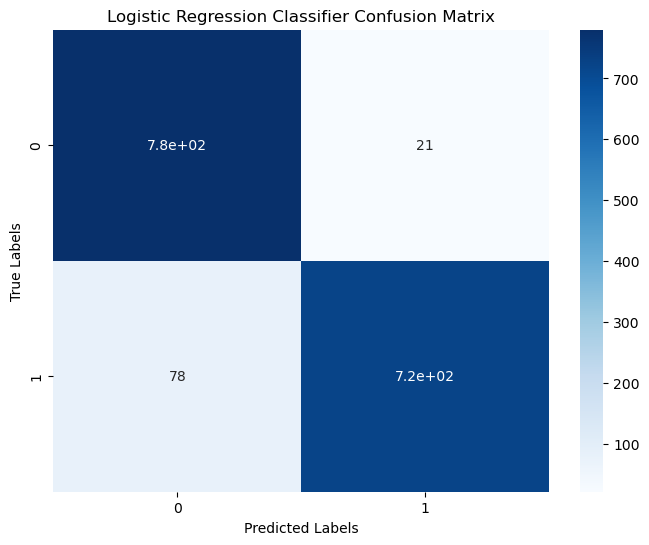

In [643]:
cm = confusion_matrix(y_test, logistic_regression_preds)
print("Confusion Matrix For Logistic Regression:")
print(cm)
# Logistic Regression Classifier Confusion Matrix
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, cmap='Blues')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


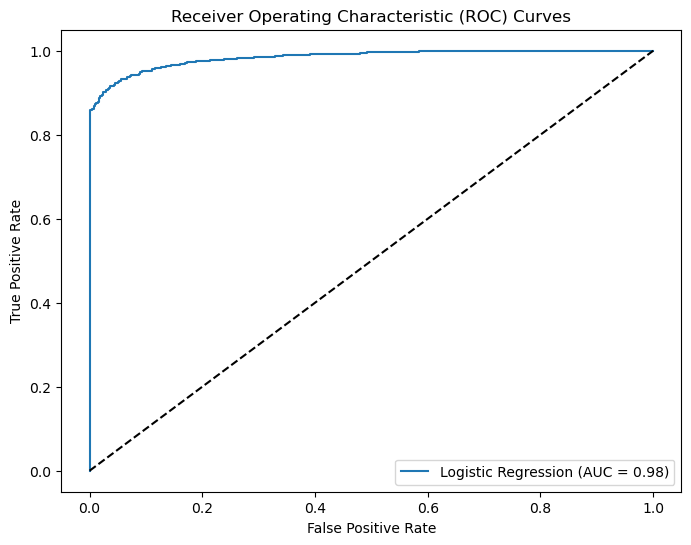

In [645]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for each classifier

log_reg_probs = log_reg.predict_proba(X_test)[:, 1]


# Calculate the false positive rate (FPR) and true positive rate (TPR) for each classifier

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)


# Calculate the AUC scores for each classifier

log_reg_auc = roc_auc_score(y_test, log_reg_probs)


# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [646]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

coefficients = log_reg.coef_[0]
feature_names = x_data.columns

# Sort coefficients in descending order
indices = np.argsort(coefficients)[::-1]

# Select the top k features
top_k = 5  # Set the desired number of top features
selected_features_lr = feature_names[indices][:top_k]

print(f"Top {top_k} features selected by Logistic Regression:")
print(selected_features_lr)

Top 5 features selected by Logistic Regression:
Index(['duration', 'day', 'pdays', 'age', 'balance'], dtype='object')


In [624]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print('KNN Classification Report:')
print(classification_report(y_test, knn_predictions))
print('---------------------------------------------------------------------')
# Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
print('Logistic Regression Classification Report:')
print(classification_report(y_test, log_reg_predictions))
print('---------------------------------------------------------------------')
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_predictions = decision_tree.predict(X_test)
print('Decision Tree Classification Report:')
print(classification_report(y_test, dt_predictions))
('-----------------------------------------------------------------------------')
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_predictions))
print('-----------------------------------------------------------------------')
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_preds = naive_bayes.predict(X_test)
print('Naive Bayes Classification Report:')
print(classification_report(y_test, naive_bayes_preds))
print('--------------------------------------------------------------'-)
# GridSearchCV for Hyperparameter Tuning
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters:', best_params)
print('--------------------------------------------------------------')
# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
print('XGBoost Classification Report:')
print(classification_report(y_test, xgb_predictions))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       801
           1       0.95      0.90      0.93       799

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.97      0.90      0.94       799

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       801
           1       0.90      0.93      0.92       799

    accuracy                           0.92      1600
   macro avg       0.

Random Forest

In [609]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_preds = random_forest.predict(x_test)
random_forest_report = classification_report(y_test, random_forest_preds)
print("Random Forest Report:")
print(random_forest_report)

Random Forest Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       801
           1       0.96      0.93      0.95       799

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



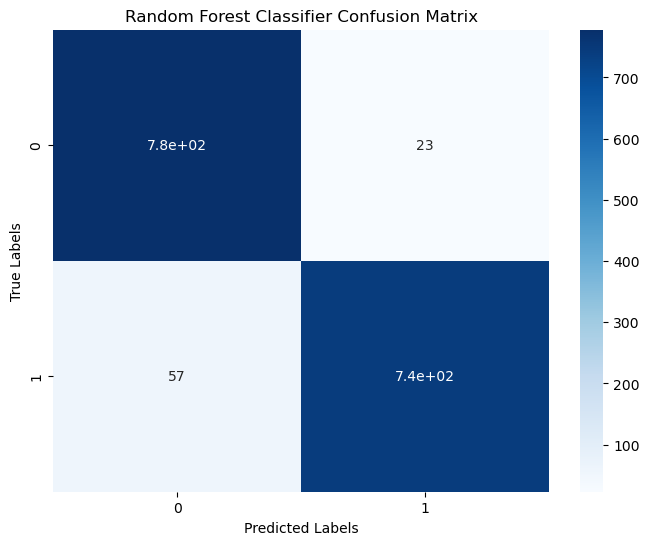

In [639]:
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

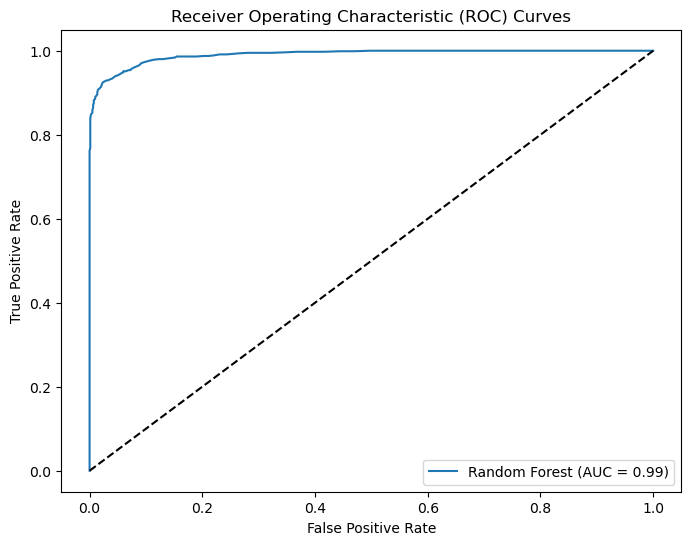

In [640]:
rf_probs = random_forest.predict_proba(X_test)[:, 1]


# Calculate the false positive rate (FPR) and true positive rate (TPR) for each classifier

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


# Calculate the AUC scores for each classifier
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [638]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

feature_importances = random_forest.feature_importances_
feature_names = x_data.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Select the top k features
top_k = 5  # Set the desired number of top features
selected_features_rf = feature_names[indices][:top_k]

print(f"Top {top_k} features selected by Random Forest:")
print(selected_features_rf)


Top 5 features selected by Random Forest:
Index(['duration', 'contact_unknown', 'housing_yes', 'balance',
       'marital_married'],
      dtype='object')


Support vector machine (SVM) 

In [610]:
svm = SVC()
svm.fit(x_train, y_train)
svm_preds= svm.predict(x_test)
svm_report= classification_report(y_test, svm_preds)
print("SVM Report:")
print(svm_report)

SVM Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       801
           1       0.97      0.90      0.93       799

    accuracy                           0.94      1600
   macro avg       0.94      0.93      0.93      1600
weighted avg       0.94      0.94      0.93      1600



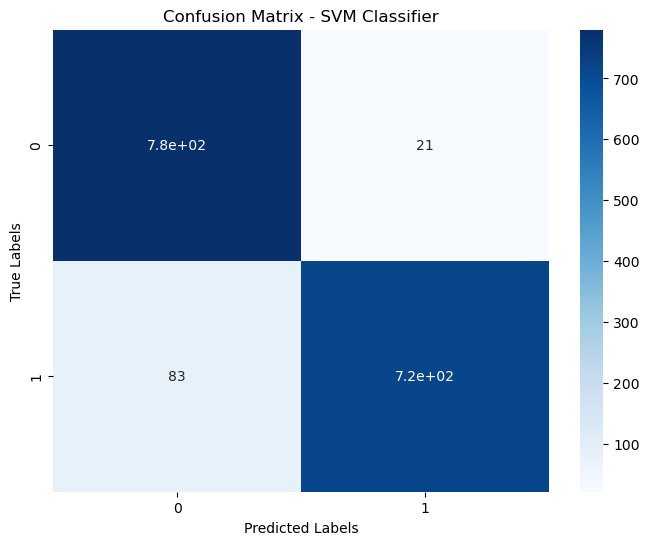

In [664]:
#confusion matrix
cm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [652]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes_preds= naive_bayes.predict(x_test)
naive_bayes_report= classification_report(y_test, naive_bayes_preds)
print("Naive Bayes Report:")
print(naive_bayes_report)

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       801
           1       0.88      0.86      0.87       799

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



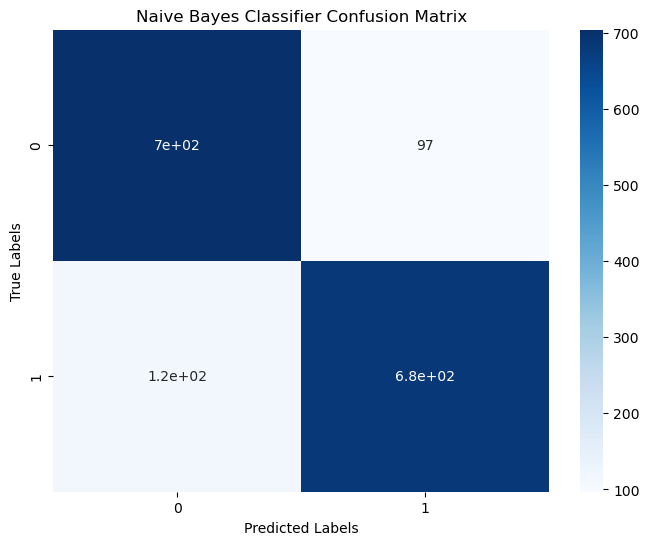

In [655]:
# Naive Bayes Classifier Confusion Matrix
nb_cm = confusion_matrix(y_test, naive_bayes_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, cmap='Blues')
plt.title('Naive Bayes Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


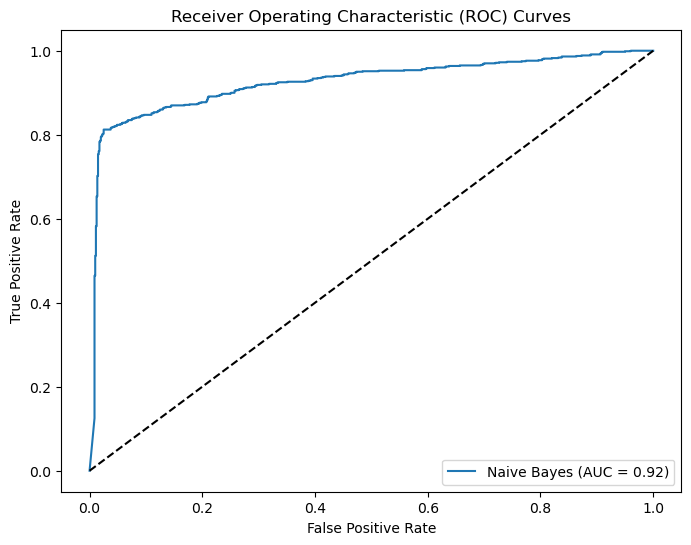

In [659]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probability.
nb_probs = naive_bayes.predict_proba(X_test)[:, 1]


# Calculate the false positive rate (FPR) and true positive rate (TPR).
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)


# Calculate the AUC scores for each classifier.
nb_auc = roc_auc_score(y_test, nb_probs)


# Plot the ROC curves.
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [657]:

# Train different models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
svm = SVC()
xgboost = XGBClassifier()


logistic_regression.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
knn.fit(x_train, y_train)
naive_bayes.fit(x_train, y_train)
svm.fit(x_train, y_train)
xgboost.fit(x_train, y_train)

# Evaluate the models
logistic_regression_preds = logistic_regression.predict(x_test)
decision_tree_preds = decision_tree.predict(x_test)
random_forest_preds = random_forest.predict(x_test)
knn_preds= knn.predict(x_test)
naive_bayes_preds= naive_bayes.predict(x_test)
svm_preds= svm.predict(x_test)
xgboost_preds= xgboost.predict(x_test)




logistic_regression_report = classification_report(y_test, logistic_regression_preds)
decision_tree_report = classification_report(y_test, decision_tree_preds)
random_forest_report = classification_report(y_test, random_forest_preds)
knn_report= classification_report(y_test, knn_preds)
naive_bayes_report= classification_report(y_test, naive_bayes_preds)
svm_report= classification_report(y_test, svm_preds)
xgboost_report= classification_report(y_test, xgboost_preds)

print("Logistic Regression Report:")
print(logistic_regression_report)
print("------------------------")
print("Random Forest Report:")
print(random_forest_report)
print("------------------------")
print("KNN Report:")
print(knn_report)
print("------------------------")
print("Naive Bayes Report:")
print(naive_bayes_report)
print("------------------------")
print("SVM Report:")
print(svm_report)
print("------------------------")
print("Xgboost Report:")
print(xgboost_report)
print("------------------------")

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.97      0.90      0.94       799

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

------------------------
Decision Tree Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       801
           1       0.91      0.93      0.92       799

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600

------------------------
Random Forest Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       801
           1       0.97      0.93      0.95       799

    accuracy                           0.95      1600
   mac

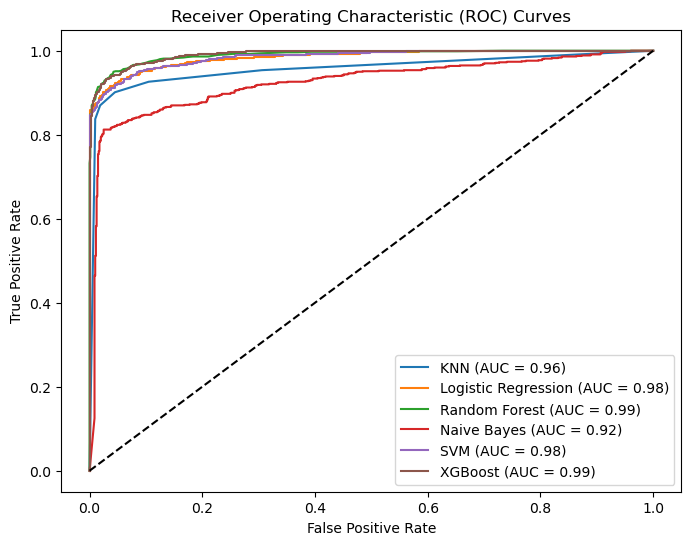

In [662]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
import xgboost as xgb

# Calculate the probabilities for each classifier
knn_probs = knn.predict_proba(X_test)[:, 1]
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
rf_probs = random_forest.predict_proba(X_test)[:, 1]
nb_probs = naive_bayes.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for each classifier
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Calculate the AUC scores for each classifier
knn_auc = roc_auc_score(y_test, knn_probs)
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
